# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('C:/data/human_body_temperature.csv')

In [2]:
# Your work here.


Question 1. Is the distribution of body temperatures normal?

Answer:<ul>
<li>
While the histogram at first glance does not appear to be normal, after running some more advanced statistics, I belive it is normal<li>
Breaking the histogram into bins in the second plot makes the graph seem more normal. <li>
Additonally proving that it is normally distributed, the skewness statistic is very close to zero. <li>
The p-value for the normal test is > .05, thus agreeing with the null hypothesis at a 95% confidence level that the data is normal. <li>
The excess kurtosis is .7. Because it is inside of the range -2 to 2, that is also another indicator that the dataset is normally distributed.   


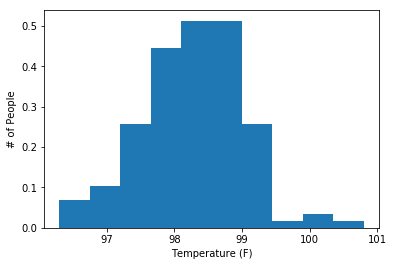

In [3]:
# Histogram
import matplotlib.pyplot as plt

#normed=True argument in a histogram makes it so the area of the histogram bars = 1
plt.hist(df['temperature'], normed=True)
plt.xlabel('Temperature (F)')
plt.ylabel('# of People')
plt.show()

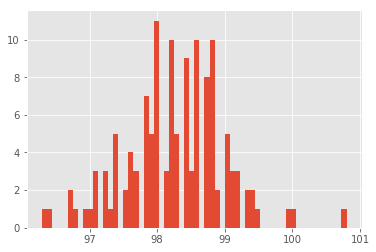

('mean : ', 98.24923076923078)
('var  : ', 0.5334224852071)
('skew : ', -0.004367976879081625)
('kurt : ', 0.7049597854114693)
('normal_test : ', NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254))


In [4]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import normaltest

import matplotlib.pyplot as plt

plt.style.use('ggplot')

data = df['temperature']
np.var(data)

plt.hist(data, bins=60)
plt.show()

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))
print("normal_test : ", normaltest(data))

Question 2. Is the sample size large? Are the observations independent?

Answer:<ul><li>
Yes it is large b/c the # of observations is 130 which is greater than 30. <li>
Yes the observations are independent b/c one person's body temperature has no impact on another person's body temperature.

Question 3. Is the true population mean really 98.6 degrees F?

Answer:<ul><li>
For #1, keep the null hypothesis that the true population mean really is 98.6 b/c the p-value is > .05  <li>
For #2, you would use a 2 sided test. This is because you're not saying if the sampled mean is greater than or if it less than, you're saying that the sampled mean is not equal to the mean.  <li>
For #3, you would use the z-score. You must know the standard deviation of the population and your sample size should be above 30 in order for you to be able to use the z-score. We know the standard deviation of the population and the sample is > 30. <li>
For #4, the p-value is close to 0 meaning that the results are statistically significantly different than the true, population mean of 98.6. The results are different b/c you're factoring in the size of your sample. 

HM Questions:<ul><ol>
<li>
For #1, is how I found the p-value correct?
<li>
For #1 & #2, should #1's p-value get doubled? it is almost 2x as large as what I'm getting for #2
<li>
For #4, is the "other" test they're referring to a t test? If so, is my answer correct?


In [5]:
#1. First, try a bootstrap hypothesis test

In [6]:
x = df['temperature']
bs_sample = np.random.choice(x, size=len(x))
true_mean = 98.6
p = float(np.sum(bs_sample >= true_mean)) / len(bs_sample)
print 'p-value = ', p

p-value =  0.330769230769


In [7]:
#2 Frequentist Test... z = (x – μ) / σ

In [10]:
import numpy as np
import scipy.stats as st
import scipy.special as sp


x = df['temperature']
n = len(x)  # number of sample records
true_value = 98.6  # null-hypothesis of fair coin
xbar = float(np.mean(x))

z_scores = (xbar - true_value) / np.std(x)
print 'p-value = ', st.norm.sf(abs(z_scores))*2


 p-value =  0.631035125585


In [ ]:
#4.  using t score instead of z score. 

In [13]:
t = float((xbar - true_value)) / float((np.std(x) / np.sqrt(len(x))))
p_values_t = st.norm.sf(abs(t))*2

print 'the t-score is', t
print 'the p-value is', p_values_t

the t-score is -5.47592520208
the p-value is 4.35231516588e-08


Question 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

Answer:<ul><li>
For #1, the t test is correct to use b/c the sample size is < 30. <li>
For #2, I notice that now you would not reject the null hypothesis using the t statistic whereas in problem 3, with a sample size of 130, you would. This shows me that the sample size has a big impact on the t statistic - which makes sense given that it's in the denominator. <li>
Additionally, the z score test does not change because changing the sample size is not in the calculation of z score


In [ ]:
# using t test with a sample size of 10

In [16]:
t = float((xbar - true_value)) / float((np.std(x) / np.sqrt(10)))
p_values_t = st.norm.sf(abs(t))*2

print 'the t-score is', t
print 'the p-value is', p_values_t

the t-score is -1.51874839205
the p-value is 0.128825840683


In [ ]:
# using z score with a sample size of 10

In [17]:
import numpy as np
import scipy.stats as st
import scipy.special as sp


x = df['temperature']
n = len(x)  # number of sample records
true_value = 98.6  # null-hypothesis of fair coin
xbar = float(np.mean(x))

z_scores = (xbar - true_value) / np.std(x)
print 'p-value = ', st.norm.sf(abs(z_scores))*2

p-value =  0.631035125585


Question 5. At what temperature should we consider someone's temperature to be "abnormal"?

Answer:<ul><li>
For #1, Using the initial sample and a 95% confidence interval, you would consider someone's temperature to be "abnormal" at 96.72 and 99.47 degrees F.


In [18]:
import numpy as np
# 95% confidence interval
conf_int = np.percentile(df['temperature'], [2.5, 97.5])
print conf_int

[ 96.7225  99.4775]


Question 6. Is there a significant difference between males and females in normal temperature?

Answer:<ul><li>
For #1, I used a hypothesis test comparing the bootstrappted replicates of the sampled data for males and females. B/c the p-value is close to 0, yes there it is statistically significant that the means of males and females' normal temperature are not equal.  


In [26]:
## first need to set up functions that will be used for analysis

def diff_of_means(data_1, data_2):
    #"""Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


def draw_perm_reps(data_1, data_2, func, size=1):
    #"""Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [29]:
import numpy as np
import scipy.stats as st
females = df[df['gender']=='F']
males = df[df['gender']=='M']
females_sample_mean = np.mean(females['temperature'])
males_sample_mean = np.mean(males['temperature'])


# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(females['temperature'], males['temperature'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(females['temperature'], males['temperature'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = float(np.sum(perm_replicates >= empirical_diff_means)) / len(perm_replicates)

# Print the result
print('p-value =', p)
print females_sample_mean
print males_sample_mean

('p-value =', 0.0107)
98.3938461538
98.1046153846


In [ ]:
# old way, no need to look at

In [ ]:
import numpy as np

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [20]:
import numpy as np
import scipy.stats as st
females = df[df['gender']=='F']
males = df[df['gender']=='M']

females_sample_mean = np.mean(females['temperature'])
males_sample_mean = np.mean(males['temperature'])

females_bs_sample = np.random.choice(females['temperature'], size=10000)
females_bs_sample_mean = np.mean(females_bs_sample)
females_bs_sample_std = np.std(females_bs_sample)

males_bs_sample = np.random.choice(males['temperature'], size=10000)
males_bs_sample_mean = np.mean(males_bs_sample)
males_bs_sample_std = np.std(males_bs_sample)


print 'the females_bs_sample mean is ', females_bs_sample_mean
print 'the males_bs_sample mean is ', males_bs_sample_mean

bs_diff_replicates = females_bs_sample_mean - males_bs_sample_mean
mean_diff = 0  # null hypothesis is that there's no difference b/t male and female body temp
#p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)   <--- this does not work
p = float(np.sum(bs_diff_replicates >= mean_diff)) / len(males_bs_sample)
print 'the p-value is ', p

the females_bs_sample mean is  98.38997
the males_bs_sample mean is  98.09833
the p-value is  0.0001
